In [13]:
###################################################################
############### Create Customer Dataset - Starts ##################
###################################################################
import torch 



from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from PIL import Image
import torchvision


In [14]:
class PressureSensorDataset():
    """
    This custom dataset class takes root directory and train flag,
    and returns dataset training dataset if train flag is true
    else it returns validation dataset.
    """

    def __init__(self, data_root, train=True, image_shape=None, transform=None):
        """
                init method of the class.

                 Parameters:

                 data_root (string): path of root directory.

                 train (boolean): True for training dataset and False for test dataset.

                 image_shape (int or tuple or list): [optional] int or tuple or list. Defaut is None.
                                                     If it is not None image will resize to the given shape.

                 transform (method): method that will take PIL image and transform it.

                """

        # set image_resize attribute
        if image_shape is not None:
            if isinstance(image_shape, int):
                self.image_shape = (image_shape, image_shape)

            elif isinstance(image_shape, tuple) or isinstance(image_shape, list):
                assert len(image_shape) == 1 or len(image_shape) == 2, 'Invalid image_shape tuple size'
                if len(image_shape) == 1:
                    self.image_shape = (image_shape[0], image_shape[0])
                else:
                    self.image_shape = image_shape
            else:
                raise NotImplementedError

        else:
            self.image_shape = image_shape

        # set transform attribute
        self.transform = transform

        num_classes = 10

        # initialize the data dictionary
        self.data_dict = {
            'image_path': [],
            'label': []
        }

        # training data path, this will be used as data root if train = True
        if train:
            img_dir = os.path.join(data_root, '20230626_1_set_2_1')

        # validation data path, this will be used as data root if train = False
        else:
            img_dir = os.path.join(data_root, '20230626_1_set_2_2')

        for img in os.listdir(img_dir):
            if img.endswith(".jpg") or img.endswith(".png"):
                img_path = os.path.join(img_dir, img)
                self.data_dict['image_path'].append(img_path)
                self.data_dict['label'].append(1)

    def __len__(self):
        """
        return length of the dataset
        """
        return len(self.data_dict['label'])

    def __getitem__(self, idx):
        """
        For given index, return images with resize and preprocessing.
        """

        image = Image.open(self.data_dict['image_path'][idx]).convert("RGB")

        if self.image_shape is not None:
            image = F.resize(image, self.image_shape)

        if self.transform is not None:
            image = self.transform(image)

        target = self.data_dict['label'][idx]

        return image, target




In [15]:
data_root = r'C:\Users\sanke\PycharmProjects\Pressure-to-Posture\Dataset\Pressure_Image_Dataset\Pressure_Sensor_Data'
#data_root = r'PycharmProjects\Pressure-to-Posture\Dataset\Pressure_Image_Dataset\Pressure_Sensor_Data'

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
    ])

test_dataset =  PressureSensorDataset(data_root, train=False, image_shape=None, transform=preprocess)



In [34]:
# dataloader with dataset
test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=20,
        shuffle=True,
        num_workers=0
    )

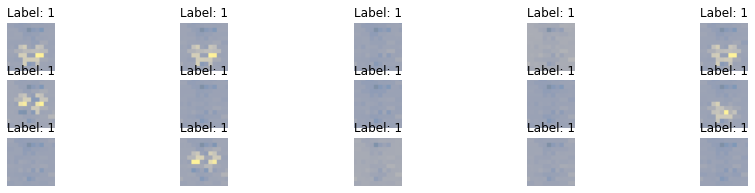

In [39]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np

# Assuming 'test_loader' is your DataLoader
for images, labels in test_loader:
    plt.figure(figsize=(15, 3))  # Adjust the figure size as needed

    # Loop to display the first 5 images
    for i in range(15):  # Iterate over the first five images
        image = images[i] / 2 + 0.5  # Unnormalize
        npimg = image.numpy()  # Convert tensor to numpy array
        rgb_img = np.transpose(npimg, (1, 2, 0))  # Reorder the channels

        plt.subplot(3, 5, i + 1)  # Create a subplot for each image
        plt.imshow(rgb_img)
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')

    plt.show()
    break  # Process only the first batch


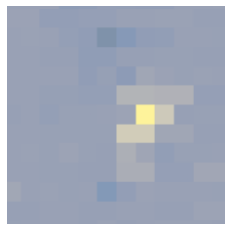

In [26]:
for images, labels in test_loader:
    # Get the first image from the batch
    first_image = images[11]

    # Print its shape
    #print(first_image.shape)

    # Print pixel values
    #print(first_image)
    
    first_image = first_image / 2 + 0.5     # Unnormalize
    #first_image
    
    npimg = first_image.numpy()
    #npimg
    
    # Ensure the channels are in the correct order for RGB
    rgb_img = np.transpose(npimg, (1, 2, 0))

    # Display the RGB image
    plt.imshow(rgb_img)
    plt.axis('off')  # Turn off axis numbers and labels
    plt.show()

    
    # Break after the first batch
    break